In [2]:
# imports of libraries
#from pylab import *  # this enables a Matlab-like syntax in python
#close('all') # close all figures
import matplotlib.pyplot as plt
import numpy as np
import pylab as pyl
plt.close("all")

In [3]:
def modulate_BSPK(bits):
    m = np.reshape(bits * 2 - 1, (-1, 1)) # reshape bits in [0,1] to [-1,1]
    return m

def detecting_BPSK(received_signal):
    # detecting (slicing) and de-mapping
    received_bits = int(np.real(received_signal) > 0)
    return received_bits

In [9]:
if __name__ == '__main__':
    # this is the main function

    # set simulation parameters here
    PSK_order=2 #BSPK
    number_of_bits = int(np.log2(PSK_order)) #number of bits to send one QAM symbol
    number_of_realizations = int(10000) #simulate this amount of packets, increase this number for a smoother BER curve
    points = int(31) 
    SNR = np.linspace(-10, 20, points)  # SNR in dB

    # init result variables
    transmitted_symbols=np.zeros((points,number_of_realizations),dtype=complex)
    detected_symbols=np.zeros((points,number_of_realizations),dtype=complex)
    BER = np.zeros((1, number_of_realizations, len(SNR))) #AWGN
    
    #print("Simulation started....")
    
    # simulation loop over SNR and random realizations
    for SNR_index, current_SNR in enumerate(SNR):
        for realization in range(number_of_realizations):
            
            #Generate data
            b = pyl.randint(0, 2, int(number_of_bits)) # pyl.randint(low,high,size)...generate random bits, Return random integers from low (inclusive) to high (exclusive), size denotes shape
            x_BD = modulate_BSPK(b) # map bits to complex symbols
            transmitted_symbols[SNR_index,realization]=x_BD #save transmitted symbols for plots


            #Add noise
            noisePower=10**(-current_SNR/20) # calculate the noise power for a given SNR value
            noise = (noisePower)*1/np.sqrt(2)*(pyl.randn(len(x_BD))+1j*pyl.randn(len(x_BD)))#generate noise

            y_AWGN =x_BD+noise # add the noise to the signal
            detected_symbols[SNR_index,realization]=y_AWGN #save the detected symbol for plots

            # detecting (slicing) and de-mapping
            b_received = detecting_BPSK(y_AWGN)
            

            # calculate bit errors
            BER[0, realization, SNR_index] = sum(abs(b - b_received)) / number_of_bits
     #   print("%.2f %%" % (100*SNR_index/len(SNR)))    
    
    #print("Simulation finished")

In [10]:
np.shape(x_BD)

(1, 1)

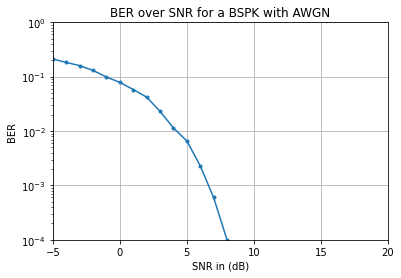

<Figure size 432x288 with 0 Axes>

In [11]:
# calculate mean BER over realizations
mean_BER = np.mean(BER, axis=1)
# plot BER
myfig = plt.figure()
plt.semilogy(SNR, mean_BER[0], marker='.')
plt.grid(True)
plt.axis([-5, 20, 1e-4, 1])
plt.ylabel('BER')
plt.xlabel('SNR in (dB)')
plt.title('BER over SNR for a BSPK with AWGN')
plt.show()
plt.savefig('BPSK_AWGN_BER_over_SNR.eps',format='eps')

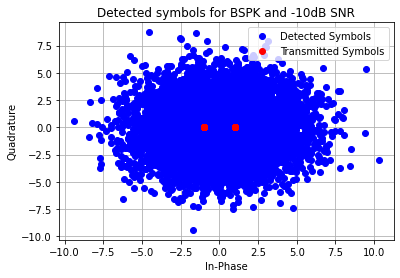

<Figure size 432x288 with 0 Axes>

In [78]:
#plot constellation diagrams for a given SNR
#SNR=-10dB
plt.figure()
plt.grid(True)
plt.plot(np.real(detected_symbols[0,]),np.imag(detected_symbols[0,]),'bo')
plt.plot(np.real(transmitted_symbols[0,]),np.imag(transmitted_symbols[0,]),'ro')
plt.ylabel('Quadrature')
plt.xlabel('In-Phase')
plt.title('Detected symbols for BSPK and -10dB SNR')
plt.legend(('Detected Symbols','Transmitted Symbols'),loc='upper right')
plt.show()
plt.savefig('BPSK_AWGN_m10dB_SNR.eps',format='eps') 

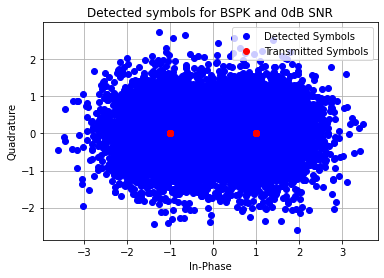

<Figure size 432x288 with 0 Axes>

In [79]:
#SNR=0dB
plt.figure()
plt.grid(True)
plt.plot(np.real(detected_symbols[10,]),np.imag(detected_symbols[10,]),'bo')
plt.plot(np.real(transmitted_symbols[10,]),np.imag(transmitted_symbols[10,]),'ro')
plt.ylabel('Quadrature')
plt.xlabel('In-Phase')
plt.title('Detected symbols for BSPK and 0dB SNR')
plt.legend(('Detected Symbols','Transmitted Symbols'),loc='upper right')
plt.show()
plt.savefig('BPSK_AWGN_0dB_SNR.eps',format='eps')

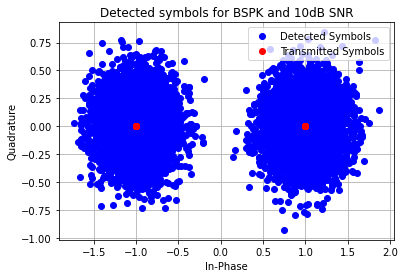

<Figure size 432x288 with 0 Axes>

In [80]:
#SNR=10dB
plt.figure()
plt.grid(True)
plt.plot(np.real(detected_symbols[20,]),np.imag(detected_symbols[20,]),'bo')
plt.plot(np.real(transmitted_symbols[20,]),np.imag(transmitted_symbols[20,]),'ro')
plt.ylabel('Quadrature')
plt.xlabel('In-Phase')
plt.title('Detected symbols for BSPK and 10dB SNR')
plt.legend(('Detected Symbols','Transmitted Symbols'),loc='upper right')
plt.show()
plt.savefig('BPSK_AWGN_10dB_SNR.eps',format='eps')

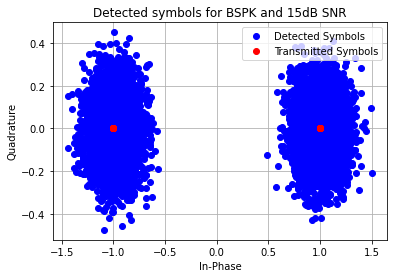

<Figure size 432x288 with 0 Axes>

In [81]:
#SNR=15dB
plt.figure()
plt.grid(True)
plt.plot(np.real(detected_symbols[25,]),np.imag(detected_symbols[25,]),'bo')
plt.plot(np.real(transmitted_symbols[25,]),np.imag(transmitted_symbols[25,]),'ro')
plt.ylabel('Quadrature')
plt.xlabel('In-Phase')
plt.title('Detected symbols for BSPK and 15dB SNR')
plt.legend(('Detected Symbols','Transmitted Symbols'),loc='upper right')
plt.show()
plt.savefig('BPSK_AWGN_15dB_SNR.eps',format='eps')